In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pylab as pl
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../datasets/employee_reviews.csv')

In [3]:
df.head()

Unnamed: 0 company           location          dates  \
0           1  google               none   Dec 11, 2018   
1           2  google  Mountain View, CA   Jun 21, 2013   
2           3  google       New York, NY   May 10, 2014   
3           4  google  Mountain View, CA    Feb 8, 2015   
4           5  google    Los Angeles, CA   Jul 19, 2018   

                                  job-title  \
0     Current Employee - Anonymous Employee   
1         Former Employee - Program Manager   
2  Current Employee - Software Engineer III   
3     Current Employee - Anonymous Employee   
4       Former Employee - Software Engineer   

                                             summary  \
0                           Best Company to work for   
1  Moving at the speed of light, burn out is inev...   
2  Great balance between big-company security and...   
3  The best place I've worked and also the most d...   
4                    Unique, one of a kind dream job   

                                                pros  \
0                      People are smart and friendly   
1  1) Food, food, food. 15+ cafes on main campus ...   
2  * If you're a software engineer, you're among ...   
3  You can't find a more well-regarded company th...   
4  Google is a world of its own. At every other c...   

                                                cons  \
0                 Bureaucracy is slowing things down   
1  1) Work/life balance. What balance? All those ...   
2  * It *is* becoming larger, and with it comes g...   
3  I live in SF so the commute can take between 1...   
4  If you don't work in MTV (HQ), you will be giv...   

                                      advice-to-mgmt  overall-ratings  \
0                                               none              5.0   
1  1) Don't dismiss emotional intelligence and ad...              4.0   
2  Keep the focus on the user. Everything else wi...              5.0   
3  Keep on NOT micromanaging - that is a huge ben...              5.0   
4  Promote managers into management for their man...              5.0   

  work-balance-stars culture-values-stars carrer-opportunities-stars  \
0                4.0                  5.0                        5.0   
1                2.0                  3.0                        3.0   
2                5.0                  4.0                        5.0   
3                2.0                  5.0                        5.0   
4                5.0                  5.0                        5.0   

  comp-benefit-stars senior-mangemnet-stars  helpful-count  \
0                4.0                    5.0              0   
1                5.0                    3.0           2094   
2                5.0                    4.0            949   
3                4.0                    5.0            498   
4                5.0                    5.0             49   

                                                link  
0  https://www.glassdoor.com/Reviews/Google-Revie...  
1  https://www.glassdoor.com/Reviews/Google-Revie...  
2  https://www.glassdoor.com/Reviews/Google-Revie...  
3  https://www.glassdoor.com/Reviews/Google-Revie...  
4  https://www.glassdoor.com/Reviews/Google-Revie...

In [4]:
df.drop(columns=['Unnamed: 0', 'link', 'summary', 'job-title', 'dates', 'advice-to-mgmt', 'location'], inplace=True)

In [5]:
df.isnull().sum()

company                       0
pros                          0
cons                          0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
helpful-count                 0
dtype: int64

In [6]:
(df['culture-values-stars']=='none').sum()

13546

In [7]:
df['work-balance-stars'] = np.where(df['work-balance-stars'] == 'none', np.nan, df['work-balance-stars'])
df['culture-values-stars'] = np.where(df['culture-values-stars'] == 'none', np.nan, df['culture-values-stars'])
df['carrer-opportunities-stars'] = np.where(df['carrer-opportunities-stars'] == 'none', np.nan, df['carrer-opportunities-stars'])
df['comp-benefit-stars'] = np.where(df['comp-benefit-stars'] == 'none', np.nan, df['comp-benefit-stars'])
df['senior-mangemnet-stars'] = np.where(df['senior-mangemnet-stars'] == 'none', np.nan, df['senior-mangemnet-stars'])

df['work-balance-stars'] = pd.to_numeric(df['work-balance-stars'])
df['culture-values-stars'] = pd.to_numeric(df['culture-values-stars'])
df['carrer-opportunities-stars'] = pd.to_numeric(df['carrer-opportunities-stars'])
df['comp-benefit-stars'] = pd.to_numeric(df['comp-benefit-stars'])
df['senior-mangemnet-stars'] = pd.to_numeric(df['senior-mangemnet-stars'])

In [8]:
df.isnull().sum()

company                           0
pros                              0
cons                              0
overall-ratings                   0
work-balance-stars             7160
culture-values-stars          13546
carrer-opportunities-stars     7108
comp-benefit-stars             7161
senior-mangemnet-stars         7775
helpful-count                     0
dtype: int64

In [9]:
df.dropna(subset=['work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars'], inplace=True)

In [10]:
df.isnull().sum()

company                       0
pros                          0
cons                          0
overall-ratings               0
work-balance-stars            0
culture-values-stars          0
carrer-opportunities-stars    0
comp-benefit-stars            0
senior-mangemnet-stars        0
helpful-count                 0
dtype: int64

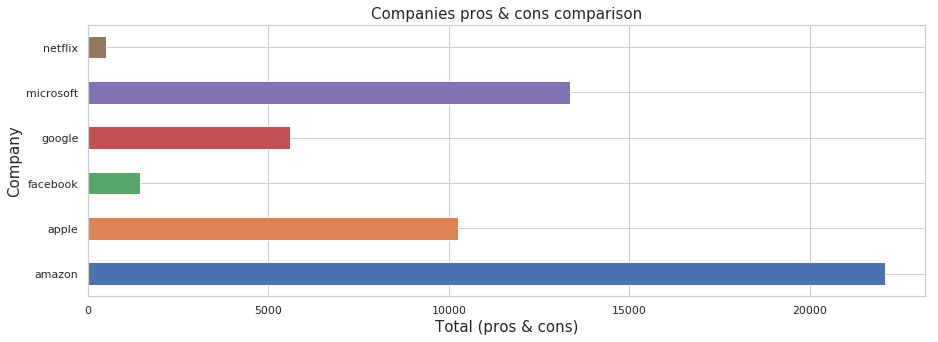

In [11]:
sns.set(context='notebook', style='whitegrid')
pl.figure(figsize =(15,5))
df.groupby(['company']).pros.count().plot('barh')
pl.ylabel('Company', fontsize=15)
pl.xlabel('Total (pros & cons)', fontsize=15)
pl.title('Companies pros & cons comparison', fontsize=15)
plt.show()

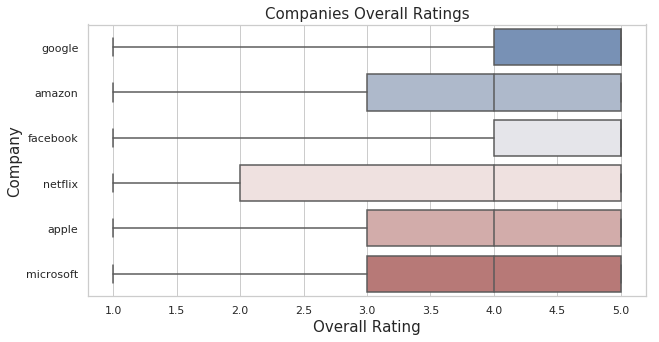

In [12]:
pl.figure(figsize =(10,5))
sns.boxplot(x="overall-ratings", y="company", data=df, whis="range", palette="vlag")
plt.xlabel('Overall Rating', fontsize=15)
plt.ylabel('Company', fontsize=15)
plt.title('Companies Overall Ratings', fontsize=15)
plt.show()

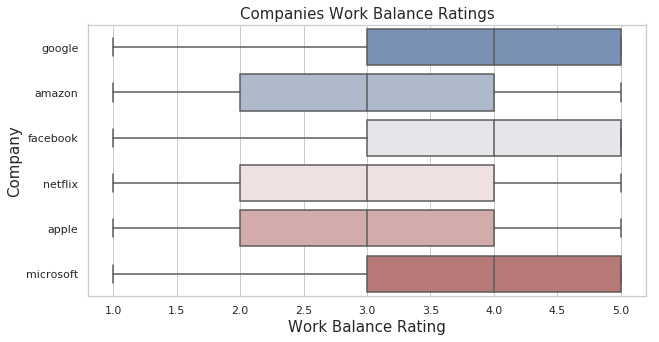

In [13]:
pl.figure(figsize =(10,5))
sns.boxplot(x="work-balance-stars", y="company", data=df, whis="range", palette="vlag")
plt.xlabel('Work Balance Rating', fontsize=15)
plt.ylabel('Company', fontsize=15)
plt.title('Companies Work Balance Ratings', fontsize=15)
plt.show()

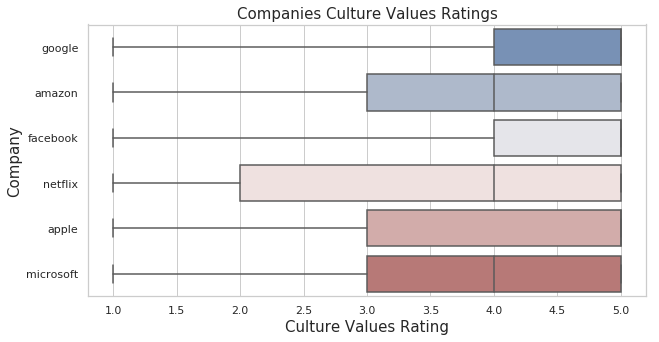

In [14]:
pl.figure(figsize =(10,5))
sns.boxplot(x="culture-values-stars", y="company", data=df, whis="range", palette="vlag")
plt.xlabel('Culture Values Rating', fontsize=15)
plt.ylabel('Company', fontsize=15)
plt.title('Companies Culture Values Ratings', fontsize=15)
plt.show()

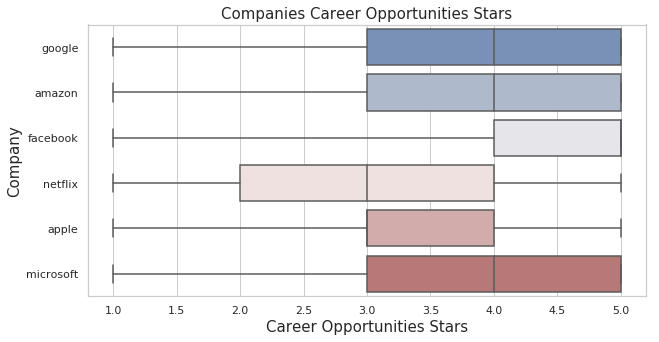

In [15]:
pl.figure(figsize =(10,5))
sns.boxplot(x="carrer-opportunities-stars", y="company", data=df, whis="range", palette="vlag")
plt.xlabel('Career Opportunities Stars', fontsize=15)
plt.ylabel('Company', fontsize=15)
plt.title('Companies Career Opportunities Stars', fontsize=15)
plt.show()

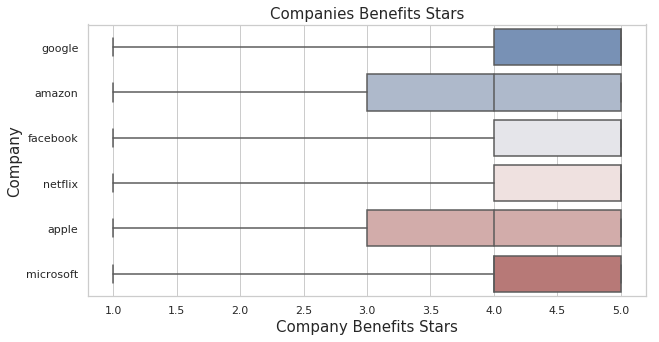

In [16]:
pl.figure(figsize =(10,5))
sns.boxplot(x="comp-benefit-stars", y="company", data=df, whis="range", palette="vlag")
plt.xlabel('Company Benefits Stars', fontsize=15)
plt.ylabel('Company', fontsize=15)
plt.title('Companies Benefits Stars', fontsize=15)
plt.show()

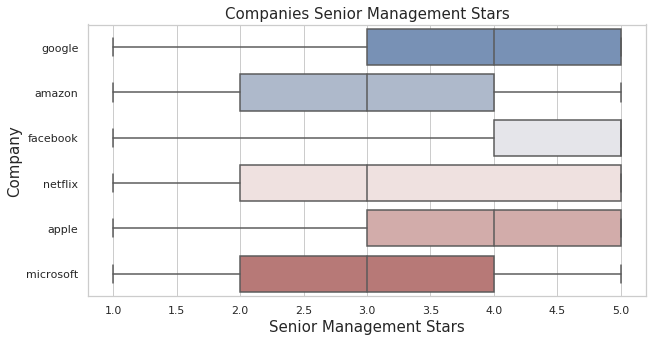

In [17]:
pl.figure(figsize =(10,5))
sns.boxplot(x="senior-mangemnet-stars", y="company", data=df, whis="range", palette="vlag")
plt.xlabel('Senior Management Stars', fontsize=15)
plt.ylabel('Company', fontsize=15)
plt.title('Companies Senior Management Stars', fontsize=15)
plt.show()

In [18]:
df['remarks'] = np.where((df['work-balance-stars'] > df['work-balance-stars'].mean())\
                           &(df['culture-values-stars']>df['culture-values-stars'].mean())\
                           &(df['carrer-opportunities-stars']>df['carrer-opportunities-stars'].mean())\
                           &(df['comp-benefit-stars']>df['comp-benefit-stars'].mean())\
                           &(df['senior-mangemnet-stars']>df['senior-mangemnet-stars'].mean()), 1, 0)

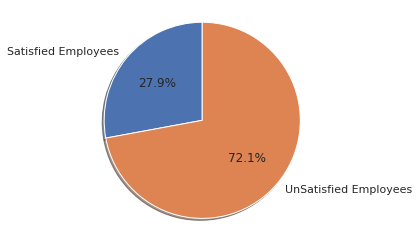

In [19]:
labels = 'Satisfied Employees', 'UnSatisfied Employees'
sizes = [(df['remarks']==1).sum(), (df['remarks']==0).sum()]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [20]:
satisfied = np.array(df[df['remarks']==1].groupby('company').remarks.count())
unsatisfied = np.array(df[df['remarks']==0].groupby('company').remarks.count())

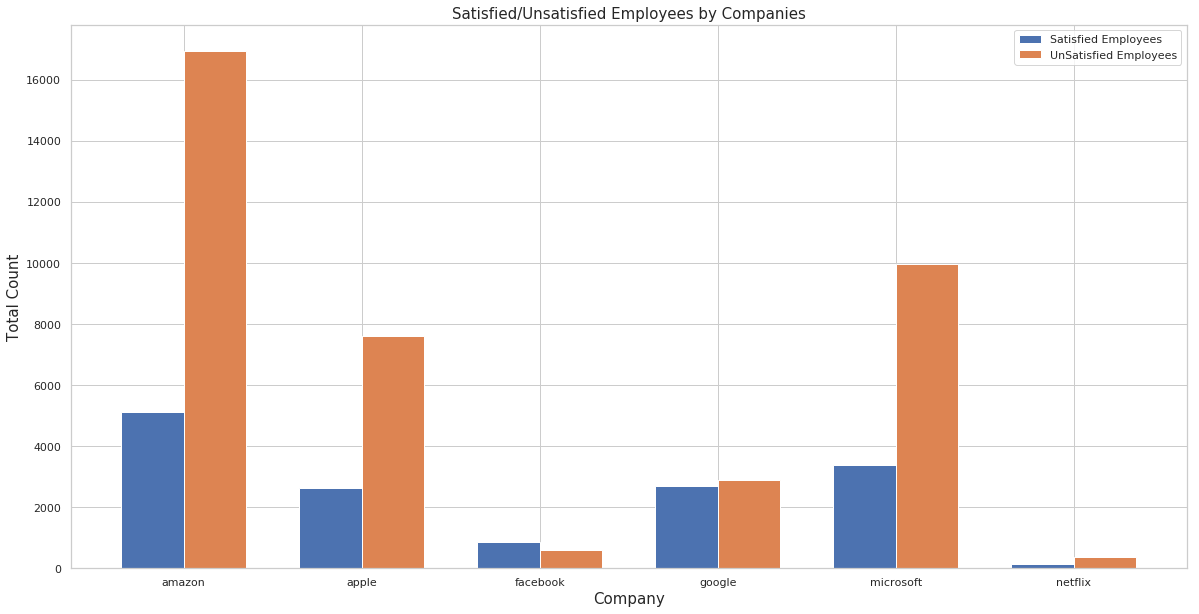

In [21]:
pl.figure(figsize =(20,10))
N = 6
ind = np.arange(N) 
width = 0.35       
plt.bar(ind, satisfied, width, label='Satisfied Employees')
plt.bar(ind + width, unsatisfied, width, label='UnSatisfied Employees')

plt.ylabel('Total Count', fontsize=15)
plt.xlabel('Company', fontsize=15)
plt.title('Satisfied/Unsatisfied Employees by Companies', fontsize=15)

plt.xticks(ind + width / 2, ('amazon', 'apple', 'facebook', 'google', 'microsoft', 'netflix'))
plt.legend(loc='best')
plt.show()

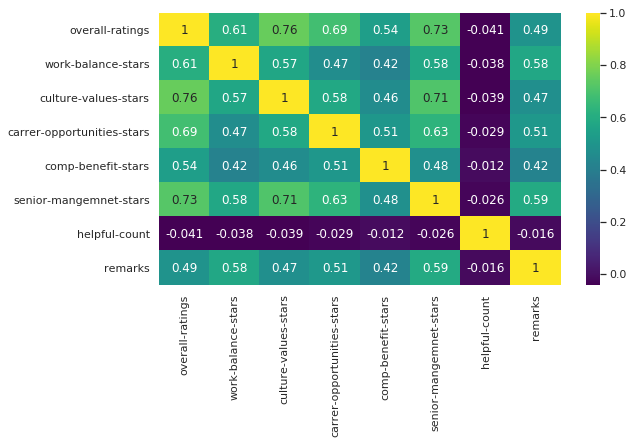

In [22]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [23]:
X = df[['overall-ratings', 'work-balance-stars', 'culture-values-stars', 'carrer-opportunities-stars', 'comp-benefit-stars', 'senior-mangemnet-stars']]
y = df['remarks']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
#Gradiente Descendente Estoc√°stico
model = SGDClassifier(max_iter=100)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print("SGD Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Mean Absolute Error:", mean_absolute_error(predictions, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGD Accuracy: 0.9083871937471817
Mean Absolute Error: 0.09161280625281827
